In [1]:
# GET ALL THE JSONS INTO ONE DATAFRAME
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import glob

# Set the search path for files (assuming the directory is relative to the current script)
file_path_mc124 = os.path.join("mc124_data", "*.json")
files = glob.glob(file_path_mc124)

# Create empty list to store dataframes
li_all_files = []

# Loop through list of files and read each one into a dataframe and append to list
for f in files:
    # Read in json
    temp_df = pd.read_json(f)
    # Append df to list
    li_all_files.append(temp_df)

# Optionally concatenate all dataframes into one if needed
if li_all_files:
    combined_df = pd.concat(li_all_files)
    print(f'Combined dataframe shape: {combined_df.shape}')
else:
    print('No dataframes were created.')


Combined dataframe shape: (542555, 6)


In [2]:
# CHECK SAMPLE OF DATAFRAME
combined_df.sample()

,datetime,station,core,component,period,value
1376,2009-02-09 21:00:00+01:00,mc124,nox,nox_1h,1h,128.0


In [3]:
# FILTER BY pm10 AND ONLY KEEP THE DATETIME AND VALUE FEATURE SINCE THE REST IS FIX
df_pm10 = combined_df[(combined_df['core'] == 'pm10')]
df_pm10_reduced = df_pm10[['datetime', 'value']]
df_pm10_reduced.head(5)

,datetime,value
0,2016-03-31T23:00:00+02:00,16.0
4,2016-03-31T22:00:00+02:00,22.0
8,2016-03-31T21:00:00+02:00,22.0
12,2016-03-31T20:00:00+02:00,24.0
16,2016-03-31T19:00:00+02:00,21.0


In [4]:
df_pm10_reduced.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 72314 entries, 0 to 3650
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  72314 non-null  object 
 1   value     71471 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [5]:
null_value = 72314 - 71471 
null_value

843

In [6]:
# OR manually calculated
nan_values_complete = df_pm10_reduced['value'].isna().sum()
nan_values_complete

843

In [7]:
nan_rows = df_pm10_reduced[df_pm10_reduced['value'].isna()]
nan_rows.head(100)

,datetime,value
808,2016-03-23T12:00:00+01:00,NaN
812,2016-03-23T11:00:00+01:00,NaN
856,2016-03-23T00:00:00+01:00,NaN
860,2016-03-22T23:00:00+01:00,NaN
864,2016-03-22T22:00:00+01:00,NaN
...,...,...
1228,2016-03-19T03:00:00+01:00,NaN
1232,2016-03-19T02:00:00+01:00,NaN
1236,2016-03-19T01:00:00+01:00,NaN
1240,2016-03-19T00:00:00+01:00,NaN


In [8]:
# check if also NaN when loading file singualily or if globbing it caused the null value
file_path_oct23 = os.path.join("mc124_data","mc124_data_2023_10.json") 
df = pd.read_json(file_path_oct23)
df_pm10_oct23 = df[(df['core'] == 'pm10')]
df_pm10_oct23.head(2)

,datetime,station,core,component,period,value
0,2023-10-31T23:00:00+01:00,mc124,pm10,pm10_1h,1h,6.0
5,2023-10-31T22:00:00+01:00,mc124,pm10,pm10_1h,1h,6.0


In [9]:
nan_values_oct23 = df_pm10_oct23['value'].isna().sum()
nan_values_oct23

2

In [10]:
# check if also NaN when loading file singualily or if globbing it caused the null value
file_path_mar16 = os.path.join("mc124_data","mc124_data_2016_03.json") 
df = pd.read_json(file_path_mar16)
df_pm10_mar16 = df[(df['core'] == 'pm10')]
nan_values_mar16 = df_pm10_mar16['value'].isna().sum()
nan_values_mar16

531

#### NaN is not caused by me but inherently in there

### DATETIME nicht nur anderer Datentyp, sondern auch Teilweise falsche regex -- AHHHHH

In [11]:
# QUICKFIX: convert datetime to UTC

#df_pm10_reduced.loc[:, 'datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], utc=True)
#df_pm10_reduced['datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], utc=True)
#df_pm10_reduced['datetime'].dt.tz_convert('UTC') 
#df_pm10_reduced['datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], utc=True)
#df_pm10_reduced['datetime'] = df_pm10_reduced['datetime'].astype(str)
# Convert 'datetime' column back to datetime format
#df_pm10_reduced['datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], utc=True)
df_pm10_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72314 entries, 0 to 3650
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  72314 non-null  object 
 1   value     71471 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [12]:
df_pm10_reduced.sample(10)

,datetime,value
565,2020-01-27 06:00:00+01:00,33.0
1160,2022-09-21 07:00:00+02:00,15.0
1365,2019-08-20 14:00:00+02:00,18.0
3565,2020-12-02 06:00:00+01:00,33.0
1780,2018-10-17T03:00:00+02:00,51.0
1130,2019-02-19 13:00:00+01:00,46.0
2880,2018-12-07 23:00:00+01:00,7.0
265,2017-01-29 18:00:00+01:00,64.0
2455,2023-10-11T12:00:00+02:00,34.0
3215,2018-04-04 04:00:00+02:00,21.0


In [13]:
nan_values = df_pm10_reduced['value'].isna().sum()
nan_values

843

In [14]:
# SORT BY datetime AS INDEX
df_pm10_reduced_index = df_pm10_reduced.set_index('datetime')
nan_values_new_index = df_pm10_reduced['value'].isna().sum()
nan_values_new_index
#df_pm10_reduced_sorted.describe()

843

In [15]:
df_pm10_reduced_sorted = df_pm10_reduced.sort_index()
nan_values_sorted = df_pm10_reduced_sorted['value'].isna().sum()
nan_values_sorted
#df_pm10_reduced_sorted.tail(10)

843

In [16]:
# TODO remove march of 2016 since it contains the majority of NaN values

In [43]:
# Wie viele Stunden pro Monat habe ich pro Monat -- alle bis auf eine Stunde null 

In [17]:
import re
def extract_year_month(datetime_obj):
    # Convert to string if it's not already
    if isinstance(datetime_obj, pd.Timestamp):
        datetime_str = datetime_obj.strftime('%Y-%m-%d %H:%M:%S%z')
    elif isinstance(datetime_obj, str):
        datetime_str = datetime_obj
    else:
        return (np.nan, np.nan)  # Return NaN if datetime_obj is not string or Timestamp

    # Regex pattern to match date components (YYYY-MM)
    pattern = r'(\d{4})-(\d{2})'

    # Use regex to find year and month
    match = re.search(pattern, datetime_str)
    if match:
        year = int(match.group(1))
        month = int(match.group(2))
        return (year, month)
    else:
        return (np.nan, np.nan)  # Return NaN if pattern not found

# Apply function to extract year and month
#df_pm10_reduced['year'], df_pm10_reduced['month'] = zip(*df_pm10_reduced['datetime'].apply(extract_year_month))
df_pm10_reduced[['year', 'month']] = df_pm10_reduced['datetime'].apply(extract_year_month).apply(pd.Series)

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_14592\2096940375.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_reduced[['year', 'month']] = df_pm10_reduced['datetime'].apply(extract_year_month).apply(pd.Series)
C:\Users\a_n_n\AppData\Local\Temp\ipykernel_14592\2096940375.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_reduced[['year', 'month']] = df_pm10_reduced['datetime'].apply(extract_year_month).apply(pd.Series)


In [18]:
# Filter rows where value is NaN
nan_rows = df_pm10_reduced[df_pm10_reduced['value'].isna()]

# Count NaN values by month
nan_count_by_month = nan_rows.groupby(['year', 'month']).size().reset_index(name='NaN_count')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the NaN count by month
print("NaN count by month:")
print(nan_count_by_month)

NaN count by month:
    year  month  NaN_count
0   2016      3        531
1   2016      8          2
2   2016     10          3
3   2017      2          1
4   2017      4          2
5   2017      7         42
6   2017      8         20
7   2017      9          3
8   2017     10          1
9   2018      3          1
10  2018      6          1
11  2018      7         26
12  2018      8         31
13  2018      9          6
14  2018     10          3
15  2018     11          4
16  2019      2         10
17  2019      3          1
18  2019      4          1
19  2019      5          3
20  2019      8          3
21  2019     10          2
22  2020      1          1
23  2020      6          1
24  2020      7          2
25  2020      8         13
26  2020      9          2
27  2020     10          3
28  2021      1          1
29  2021      8          3
30  2021     10          2
31  2022      4          1
32  2022      5          1
33  2022     10          1
34  2022     12          1
35  2023

In [19]:
# Filter out days where all values are NaN
df_pm10_reduced_dt = df_pm10_reduced
df_pm10_reduced_dt['datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], utc=True)
daily_nan_counts = df_pm10_reduced_dt.groupby(df_pm10_reduced_dt['datetime'].dt.date)['value'].apply(lambda x: x.isna().all()).reset_index()

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_14592\3477224990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_reduced_dt['datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], utc=True)


In [20]:
completely_nan_days = daily_nan_counts[daily_nan_counts['value'] == True]['datetime']
completely_nan_days

0       2016-02-29
1       2016-03-01
2       2016-03-02
3       2016-03-03
4       2016-03-04
5       2016-03-05
6       2016-03-06
7       2016-03-07
8       2016-03-08
9       2016-03-09
10      2016-03-10
11      2016-03-11
12      2016-03-12
13      2016-03-13
14      2016-03-14
15      2016-03-15
16      2016-03-16
17      2016-03-17
18      2016-03-18
19      2016-03-19
20      2016-03-20
21      2016-03-21
22      2016-03-22
499     2017-07-12
2618    2023-05-01
Name: datetime, dtype: object

In [ ]:
# Durchschnitt der Wochentage des Monats als Ersatz benutzen

In [21]:
completely_nan_days.count()

25

In [22]:
# analysing July 2023
file_path_july_2023 = os.path.join("..", "mc124_data","mc124_data_2023_07.json")# join because different os use either \ or / as file path seperators
df_july_2023 = pd.read_json(file_path_july_2023)
df_pm10_july_2023 = df_july_2023[(df_july_2023['core'] == 'pm10')]
df_pm10_july_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 0 to 3715
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   datetime   744 non-null    datetime64[ns, UTC+02:00]
 1   station    744 non-null    object                   
 2   core       744 non-null    object                   
 3   component  744 non-null    object                   
 4   period     744 non-null    object                   
 5   value      680 non-null    float64                  
dtypes: datetime64[ns, UTC+02:00](1), float64(1), object(4)
memory usage: 40.7+ KB


In [23]:
df_pm10_july_2023.describe()

,value
count,680.000000
mean,16.413235
std,5.086423
min,8.000000
25%,13.000000
50%,15.000000
75%,19.000000
max,65.000000


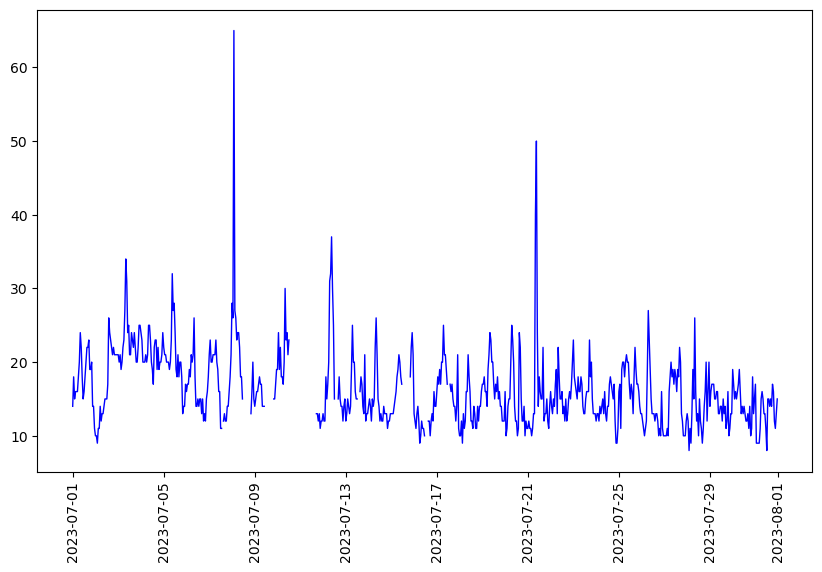

In [24]:
df_pm10_july_2023 = df_pm10_july_2023.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(df_pm10_july_2023[['value']], color="blue", linewidth=1)

##### Spike: Kultur-Demo: Rave The Planet Parade am 08. Juli 2023 in Berlin. -- Umleitung Traffic oder da lang gelaufen?

In [25]:
# what do I do when a whole week is missing?
nan_rows_07_23 = df_pm10_july_2023[df_pm10_july_2023['value'].isna()]
nan_rows_07_23.head(100)

,station,core,component,period,value
datetime,,,,,
2023-07-07 14:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN
2023-07-08 12:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN
2023-07-08 13:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN
2023-07-08 14:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN
2023-07-08 15:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN
2023-07-08 16:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN
2023-07-08 17:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN
2023-07-08 18:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN
2023-07-08 19:00:00+02:00,mc124,pm10,pm10_1h,1h,NaN


In [26]:
# analysing June 2023
file_path_june_2023 = os.path.join("..", "mc124_data","mc124_data_2023_06.json")# join because different os use either \ or / as file path seperators
df_june_2023 = pd.read_json(file_path_june_2023)
df_pm10_june_2023 = df_june_2023[(df_june_2023['core'] == 'pm10')]
df_pm10_june_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 3595
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   datetime   720 non-null    datetime64[ns, UTC+02:00]
 1   station    720 non-null    object                   
 2   core       720 non-null    object                   
 3   component  720 non-null    object                   
 4   period     720 non-null    object                   
 5   value      714 non-null    float64                  
dtypes: datetime64[ns, UTC+02:00](1), float64(1), object(4)
memory usage: 39.4+ KB


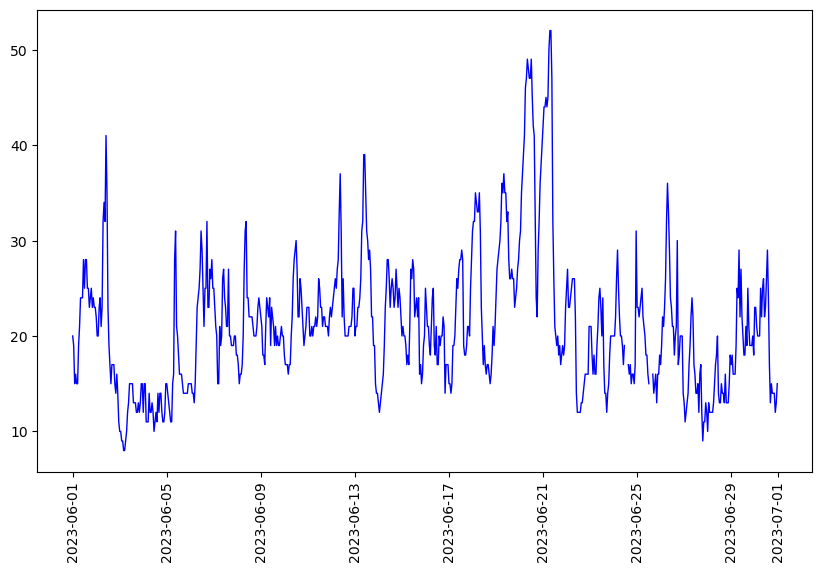

In [27]:
df_pm10_june_2023 = df_pm10_june_2023.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(df_pm10_june_2023[['value']], color="blue", linewidth=1)

In [38]:
# analysing Oct 2023
file_path_oct_2023 = os.path.join("..", "mc124_data","mc124_data_2023_10.json")# join because different os use either \ or / as file path seperators
df_oct_2023 = pd.read_json(file_path_oct_2023)
df_pm10_oct_2023 = df_oct_2023[(df_oct_2023['core'] == 'pm10')]
df_pm10_oct_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 0 to 3715
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   744 non-null    object 
 1   station    744 non-null    object 
 2   core       744 non-null    object 
 3   component  744 non-null    object 
 4   period     744 non-null    object 
 5   value      742 non-null    float64
dtypes: float64(1), object(5)
memory usage: 40.7+ KB


In [39]:
df_pm10_oct_2023.head(5)

,datetime,station,core,component,period,value
0,2023-10-31T23:00:00+01:00,mc124,pm10,pm10_1h,1h,6.0
5,2023-10-31T22:00:00+01:00,mc124,pm10,pm10_1h,1h,6.0
10,2023-10-31T21:00:00+01:00,mc124,pm10,pm10_1h,1h,7.0
15,2023-10-31T20:00:00+01:00,mc124,pm10,pm10_1h,1h,10.0
20,2023-10-31T19:00:00+01:00,mc124,pm10,pm10_1h,1h,11.0


In [40]:
df_pm10_oct_2023.tail(5)

,datetime,station,core,component,period,value
3695,2023-10-01T04:00:00+02:00,mc124,pm10,pm10_1h,1h,16.0
3700,2023-10-01T03:00:00+02:00,mc124,pm10,pm10_1h,1h,18.0
3705,2023-10-01T02:00:00+02:00,mc124,pm10,pm10_1h,1h,20.0
3710,2023-10-01T01:00:00+02:00,mc124,pm10,pm10_1h,1h,22.0
3715,2023-10-01T00:00:00+02:00,mc124,pm10,pm10_1h,1h,23.0


In [41]:
df_pm10_oct_2023['datetime'] = pd.to_datetime(df_pm10_oct_2023['datetime'], utc=True)
#df_pm10_oct_2023[df_pm10_oct_2023['datetime']=='2023-10-27T17:00:00+02:00'].info()

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_14592\2489083424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_oct_2023['datetime'] = pd.to_datetime(df_pm10_oct_2023['datetime'], utc=True)


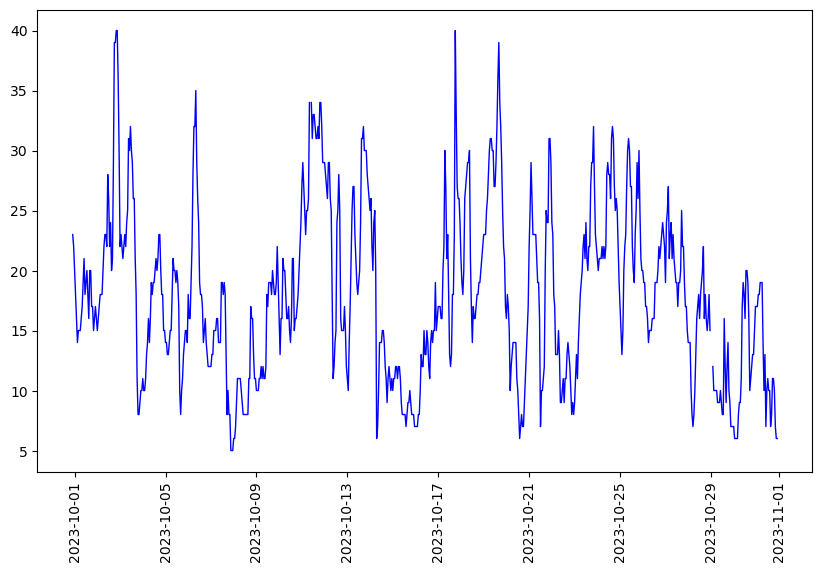

In [42]:
df_pm10_oct_2023 = df_pm10_oct_2023.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(df_pm10_oct_2023[['value']], color="blue", linewidth=1)